# EDA ON THE DATA AND TREND ANALYSIS

## Understanding the Schema

> The datasets given
    - First set contains the quiz information which is in detail questions, answers all related to the quiz given by the current user.
    - Second set constins the summary and marks, rank and other details that summarizes the quiz alsong with the response map and quiz details.
    - Third set is the previous 5 test data summary same as the above set.

> So for the analysis we take the test summary details, like score, final_score, negative_score etc and few details related to the quiz for the analysis and prediction of the rank.

#### Current user data


In [3]:
c_user_data = pd.read_csv('c_sub_data.csv')
c_user_data.head()


,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,response_map,quiz,next_steps
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8,"{'1837': 7363, '1848': 7407, '1852': 7423, '18...","{'id': 43, 'name': None, 'title': 'Structural ...",[{'pageType': 'resultPage'}]


In [4]:
c_user_data.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'response_map', 'quiz', 'next_steps'],
      dtype='object')

Seperating the required columns and not loading the quiz data

In [5]:
c_user_data = c_user_data[['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count']]

In [6]:
c_user_data.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,source,type,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count
0,336566,43,7ZXdz3zHuNcdg9agb5YpaOGLQqw2,2025-01-17T15:51:29.859+05:30,2025-01-17T15:51:29.871+05:30,2025-01-17T15:51:29.871+05:30,32,2,80 %,100,...,live,topic,2025-01-17T16:20:44.000+05:30,2025-01-17T16:21:28.000+05:30,15:00,24,128,Topic Rank - #2402,6,8


#### Historic data

In [7]:
all_user_data = pd.read_csv('prev_5.csv')
all_user_data.columns

Index(['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed',
       ...
       'response_map.3194', 'response_map.2417', 'response_map.2425',
       'response_map.2435', 'response_map.2440', 'response_map.2444',
       'response_map.2452', 'response_map.2459', 'response_map.2469',
       'response_map.2515'],
      dtype='object', length=287)

In [8]:
df = all_user_data[['id', 'quiz_id', 'user_id', 'submitted_at', 'created_at', 'updated_at',
       'score', 'trophy_level', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'source',
       'type', 'started_at', 'ended_at', 'duration', 'better_than',
       'total_questions', 'rank_text', 'mistakes_corrected',
       'initial_mistake_count', 'quiz.title', 'quiz.topic']]

In [9]:
df.head()

,id,quiz_id,user_id,submitted_at,created_at,updated_at,score,trophy_level,accuracy,speed,...,started_at,ended_at,duration,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz.title,quiz.topic
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,2025-01-17T15:30:18.044+05:30,2025-01-17T15:30:18.044+05:30,108,2,90 %,100,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,15:00,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,2025-01-17T15:17:44.056+05:30,2025-01-17T15:17:44.056+05:30,92,1,100 %,100,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,15:00,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body Fluids and Circulation
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,2025-01-16T20:13:19.699+05:30,2025-01-16T20:13:19.699+05:30,116,2,96 %,100,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,15:00,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,2025-01-16T20:00:11.573+05:30,2025-01-16T20:00:11.573+05:30,36,2,90 %,100,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,15:00,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body Fluids and Circulation
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,2025-01-15T20:34:39.478+05:30,2025-01-15T20:34:39.478+05:30,36,3,31 %,96,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,15:00,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation


## Analyzing the Data

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     14 non-null     int64  
 1   quiz_id                14 non-null     int64  
 2   user_id                14 non-null     object 
 3   submitted_at           14 non-null     object 
 4   created_at             14 non-null     object 
 5   updated_at             14 non-null     object 
 6   score                  14 non-null     int64  
 7   trophy_level           14 non-null     int64  
 8   accuracy               14 non-null     object 
 9   speed                  14 non-null     int64  
 10  final_score            14 non-null     float64
 11  negative_score         14 non-null     float64
 12  correct_answers        14 non-null     int64  
 13  incorrect_answers      14 non-null     int64  
 14  source                 14 non-null     object 
 15  type    

The cleaned dataframe has all the required columns for the analysis.

- `Details of the quiz` : quiz_id, quiz.title, quiz.topic
- `Performance metrics`: score, final_score, negative_score, accuracy, speed, correct_answers, incorrect_answers
- `Time based details`: submitted_at, started_at, ended_at, duration
- `Rank and Mistakes`: rank_text, better_than, mistakes_corrected, initial_mistake_count


In [12]:
df.isna().sum()

id                       0
quiz_id                  0
user_id                  0
submitted_at             0
created_at               0
updated_at               0
score                    0
trophy_level             0
accuracy                 0
speed                    0
final_score              0
negative_score           0
correct_answers          0
incorrect_answers        0
source                   0
type                     0
started_at               0
ended_at                 0
duration                 0
better_than              0
total_questions          0
rank_text                0
mistakes_corrected       0
initial_mistake_count    0
quiz.title               0
quiz.topic               0
dtype: int64

> No null values present in the data

#### Conversion `rank_text` to number

In [13]:
rank = re.search(r'#-?(\d+)', 'Topic Rank #-825')
rank.group(0), rank.group(1)


('#-825', '825')

Applying thr logic to entire column

In [14]:
df['rank'] = df['rank_text'].str.extract(r'#-?(\d+)').astype(int)
df[['rank_text', 'rank']]

C:\Users\sreem\AppData\Local\Temp\ipykernel_28960\3461865500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rank'] = df['rank_text'].str.extract(r'#-?(\d+)').astype(int)


,rank_text,rank
0,Topic Rank - #-171,171
1,Topic Rank - #-9140,9140
2,Topic Rank - #-418,418
3,Topic Rank - #-1598,1598
4,Topic Rank - #2023,2023
5,Topic Rank - #1810,1810
6,Topic Rank - #-1598,1598
7,Topic Rank - #2556,2556
8,Topic Rank - #-8479,8479
9,Topic Rank - #-2380,2380


### Data transformation

**Removal of Unwanted columns**

The columns submitted_at, created_at, updated_at have litte relevance to the current analysis, therefore deleting the columns. The column duration is the same for all the rows, deleting it as well.

In [15]:
df = df.drop(['created_at', 'updated_at', 'duration'], axis=1)


In [16]:
df.head()

,id,quiz_id,user_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,...,started_at,ended_at,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz.title,quiz.topic,rank
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:30:18.027+05:30,108,2,90 %,100,105.0,3.0,...,2025-01-17T15:18:30.000+05:30,2025-01-17T15:30:15.000+05:30,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation,171
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-17T15:17:44.042+05:30,92,1,100 %,100,92.0,0.0,...,2025-01-17T15:07:45.000+05:30,2025-01-17T15:17:41.000+05:30,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body Fluids and Circulation,9140
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:13:19.682+05:30,116,2,96 %,100,115.0,1.0,...,2025-01-16T20:01:10.000+05:30,2025-01-16T20:13:18.000+05:30,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation,418
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-16T20:00:11.562+05:30,36,2,90 %,100,35.0,1.0,...,2025-01-16T19:52:57.000+05:30,2025-01-16T20:00:09.000+05:30,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body Fluids and Circulation,1598
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,2025-01-15T20:34:39.462+05:30,36,3,31 %,96,16.0,20.0,...,2025-01-15T20:21:25.000+05:30,2025-01-15T20:34:38.000+05:30,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation,2023


**Date time convertion of relevant columns**

In [17]:
df['started_at'] = pd.to_datetime(df['started_at']).dt.strftime('%d-%m-%y %H:%M:%S')
df['ended_at'] = pd.to_datetime(df['ended_at']).dt.strftime('%d-%m-%y %H:%M:%S')
df['submitted_at'] = pd.to_datetime(df['submitted_at']).dt.strftime('%d-%m-%y %H:%M:%S')

In [18]:
df.head()

,id,quiz_id,user_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,...,started_at,ended_at,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz.title,quiz.topic,rank
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,17-01-25 15:30:18,108,2,90 %,100,105.0,3.0,...,17-01-25 15:18:30,17-01-25 15:30:15,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation,171
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,17-01-25 15:17:44,92,1,100 %,100,92.0,0.0,...,17-01-25 15:07:45,17-01-25 15:17:41,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body Fluids and Circulation,9140
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,16-01-25 20:13:19,116,2,96 %,100,115.0,1.0,...,16-01-25 20:01:10,16-01-25 20:13:18,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation,418
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,16-01-25 20:00:11,36,2,90 %,100,35.0,1.0,...,16-01-25 19:52:57,16-01-25 20:00:09,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body Fluids and Circulation,1598
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,15-01-25 20:34:39,36,3,31 %,96,16.0,20.0,...,15-01-25 20:21:25,15-01-25 20:34:38,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation,2023


**Cleaning the topic data**
> The column data is not uniform same topic names have been saved in diffrent formats, changing the\m to bring un iformity of the data

In [19]:
df['quiz.title'].unique()

array(['Human Physiology (15)', 'Human Physiology PYQ', 'Reproduction',
       'PRINCIPLES OF INHERITANCE AND VARIATION PYQ',
       'MICROBES IN HUMAN WELFARE  PYQ', 'REPRODUCTIVE HEALTH PYQ',
       'HUMAN HEALTH AND DISEASE PYQ', 'Human Physiology (14)'],
      dtype=object)

In [20]:
def clean_title(title):
    title_lower= re.sub(r'\s*\(.*?\)|\s*pyq', '', title.lower())
    return title_lower

df['title'] = df['quiz.title'].apply(clean_title)



In [21]:
df[['quiz.title', 'title', 'quiz.topic']]

,quiz.title,title,quiz.topic
0,Human Physiology (15),human physiology,Body Fluids and Circulation
1,Human Physiology PYQ,human physiology,Body Fluids and Circulation
2,Human Physiology (15),human physiology,Body Fluids and Circulation
3,Human Physiology PYQ,human physiology,Body Fluids and Circulation
4,Human Physiology (15),human physiology,Body Fluids and Circulation
5,Reproduction,reproduction,Human Reproduction
6,Human Physiology PYQ,human physiology,Body Fluids and Circulation
7,PRINCIPLES OF INHERITANCE AND VARIATION PYQ,principles of inheritance and variation,principles of inheritance and variation
8,MICROBES IN HUMAN WELFARE PYQ,microbes in human welfare,microbes in human welfare
9,REPRODUCTIVE HEALTH PYQ,reproductive health,reproductive health


In [22]:
df['quiz.topic'].value_counts()

quiz.topic
Body Fluids and Circulation                 3
Body Fluids and Circulation                 3
reproductive health                         2
Human Reproduction                          1
principles of inheritance and variation     1
microbes in human welfare                   1
human health and disease                    1
Reproductive Health                         1
Respiration and Gas Exchange                1
Name: count, dtype: int64

In [23]:
df['quiz.topic'].replace('Body Fluids and Circulation ', 'Body fluids and circulation', inplace=True)
df['quiz.topic'].replace('Body Fluids and Circulation', 'Body fluids and circulation', inplace=True)
df['quiz.topic'].replace('reproductive health ', 'Reproductive Health', inplace=True)

In [24]:
df['quiz.topic'].value_counts()

quiz.topic
Body Fluids and Circulation                 3
Body fluids and circulation                 3
Reproductive Health                         3
Human Reproduction                          1
principles of inheritance and variation     1
microbes in human welfare                   1
human health and disease                    1
Respiration and Gas Exchange                1
Name: count, dtype: int64

In [25]:
df['accuracy'] = df['accuracy'].str.replace('%', '').astype(float)

In [26]:
df.head()

,id,quiz_id,user_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,...,ended_at,better_than,total_questions,rank_text,mistakes_corrected,initial_mistake_count,quiz.title,quiz.topic,rank,title
0,336497,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,17-01-25 15:30:18,108,2,90.0,100,105.0,3.0,...,17-01-25 15:30:15,107,100,Topic Rank - #-171,9,12,Human Physiology (15),Body Fluids and Circulation,171,human physiology
1,336448,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,17-01-25 15:17:44,92,1,100.0,100,92.0,0.0,...,17-01-25 15:17:41,395,23,Topic Rank - #-9140,3,3,Human Physiology PYQ,Body fluids and circulation,9140,human physiology
2,333330,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,16-01-25 20:13:19,116,2,96.0,100,115.0,1.0,...,16-01-25 20:13:18,115,100,Topic Rank - #-418,11,12,Human Physiology (15),Body Fluids and Circulation,418,human physiology
3,333242,6,YcDFSO4ZukTJnnFMgRNVwZTE4j42,16-01-25 20:00:11,36,2,90.0,100,35.0,1.0,...,16-01-25 20:00:09,152,23,Topic Rank - #-1598,1,2,Human Physiology PYQ,Body fluids and circulation,1598,human physiology
4,329504,51,YcDFSO4ZukTJnnFMgRNVwZTE4j42,15-01-25 20:34:39,36,3,31.0,96,16.0,20.0,...,15-01-25 20:34:38,35,100,Topic Rank - #2023,0,20,Human Physiology (15),Body Fluids and Circulation,2023,human physiology


## Student performance

**Performance by Topic and title**

In [27]:
topic_perf_tp= df.groupby(['quiz.topic'])['score'].mean().reset_index()
topic_perf_tp.sort_values('score', ascending=False)

,quiz.topic,score
5,human health and disease,112.000000
0,Body Fluids and Circulation,86.666667
6,microbes in human welfare,76.000000
1,Body fluids and circulation,54.666667
3,Reproductive Health,52.000000
2,Human Reproduction,40.000000
4,Respiration and Gas Exchange,24.000000
7,principles of inheritance and variation,12.000000


In [28]:
topic_perf = df.groupby(['title'])['score'].mean().reset_index()
topic_perf.sort_values('score', ascending=False)

,title,score
0,human health and disease,112.0
2,microbes in human welfare,76.0
1,human physiology,64.0
5,reproductive health,52.0
4,reproduction,46.0
3,principles of inheritance and variation,12.0


In [29]:
topic_perf_ns = df.groupby(['title'])['negative_score'].mean().reset_index()
topic_perf_ns.sort_values('negative_score')

,title,negative_score
2,microbes in human welfare,0.000000
5,reproductive health,1.500000
0,human health and disease,2.000000
1,human physiology,5.285714
3,principles of inheritance and variation,7.000000
4,reproduction,16.500000


**Accuracy Treands**

In [30]:
accuracy_trend = df.groupby('quiz.topic')['accuracy'].mean().reset_index()
accuracy_trend.sort_values('accuracy', ascending=False)

,quiz.topic,accuracy
6,microbes in human welfare,100.000000
5,human health and disease,93.000000
1,Body fluids and circulation,80.000000
3,Reproductive Health,75.666667
0,Body Fluids and Circulation,72.333333
4,Respiration and Gas Exchange,66.000000
2,Human Reproduction,38.000000
7,principles of inheritance and variation,30.000000


**Impact of the negative score on final score**

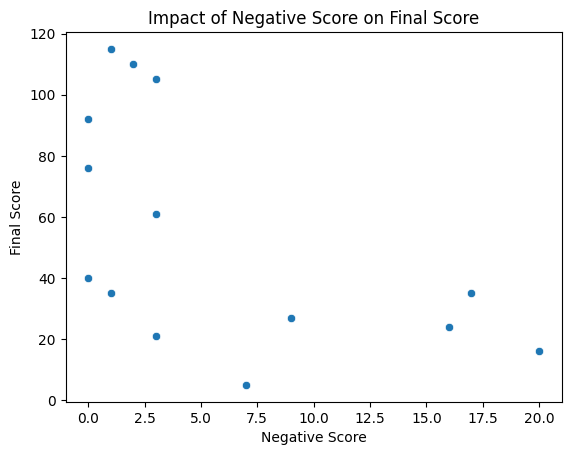

In [31]:
sns.scatterplot(x=df['negative_score'], y=df['final_score'])
plt.title("Impact of Negative Score on Final Score")
plt.xlabel("Negative Score")
plt.ylabel("Final Score")
plt.show()

**Speed vs Accuracy**

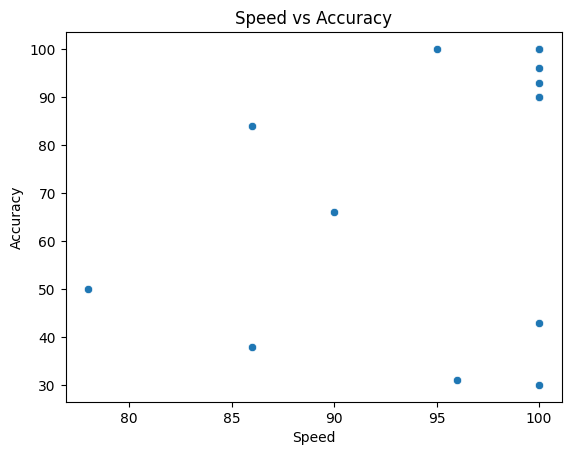

In [32]:
sns.scatterplot(x=df['speed'], y=df['accuracy'])
plt.title("Speed vs Accuracy")
plt.xlabel("Speed")
plt.ylabel("Accuracy")
plt.show()


**Rank Trend**

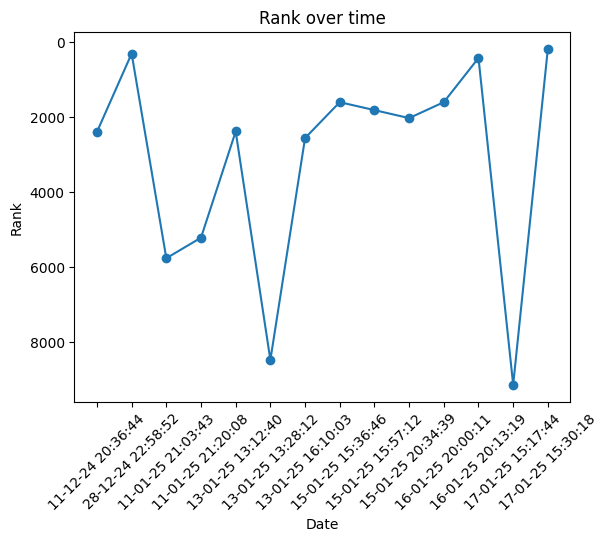

In [33]:
rank_trend = df[['submitted_at', 'rank']]

# rank_trend['submitted_at'] = pd.to_datetime(rank_trend['submitted_at']).dt.date

plt.plot(rank_trend['submitted_at'], rank_trend['rank'], marker='o')
plt.gca().invert_yaxis() 
plt.gca().invert_xaxis()
plt.title("Rank over time")
plt.xlabel("Date")
plt.ylabel("Rank")
plt.xticks(rotation=45)
plt.show()



## Insights
> Highlighting the weak areas, improvment trends, preformance gaps for the user

**Weak Topics**
- `Principles of Inheritance and Variation` has the **lowest score (12.0) and lowest accuracy(30%)**, indicating a need for more focused revision.
- `Respiration and Gas Exchange` also has a low score (24.0), suggesting *difficulty in this topic*.
- `Human Reproduction` (40.0) and seconfd lowest accuracy (38%) and `Reproductive Health` (52.0) are also areas *requiring improvement*.
- Consolidating title vise: Even though `human physiology` has a mean score of 64, the topic `Respiration and Gas Exchange` needs improvement. Reproduction and Reproductive Health are *difficult titles*.
- 


**Mistake Pattern**

- **Reproduction** has a highest negative score (16.5), suggesting students struggle with answer selection in this topic.
- **Principles of Inheritance and Variation** has the highest negative score (7.0), indicating frequent incorrect attempts.
- It is observed that with increase in the negative score the final score is heavily impacted.


**Rank Progression**

- Fluctuations are present, it indicates inconsistent performance, requiring a more structured study plan.


## Rank Prediction

Test Data

In [34]:
X = df.drop(columns=['id', 'user_id','rank', 'rank_text'], axis=1)

In [35]:
X.head()

,quiz_id,submitted_at,score,trophy_level,accuracy,speed,final_score,negative_score,correct_answers,incorrect_answers,...,type,started_at,ended_at,better_than,total_questions,mistakes_corrected,initial_mistake_count,quiz.title,quiz.topic,title
0,51,17-01-25 15:30:18,108,2,90.0,100,105.0,3.0,27,3,...,topic,17-01-25 15:18:30,17-01-25 15:30:15,107,100,9,12,Human Physiology (15),Body Fluids and Circulation,human physiology
1,6,17-01-25 15:17:44,92,1,100.0,100,92.0,0.0,23,0,...,topic,17-01-25 15:07:45,17-01-25 15:17:41,395,23,3,3,Human Physiology PYQ,Body fluids and circulation,human physiology
2,51,16-01-25 20:13:19,116,2,96.0,100,115.0,1.0,29,1,...,topic,16-01-25 20:01:10,16-01-25 20:13:18,115,100,11,12,Human Physiology (15),Body Fluids and Circulation,human physiology
3,6,16-01-25 20:00:11,36,2,90.0,100,35.0,1.0,9,1,...,topic,16-01-25 19:52:57,16-01-25 20:00:09,152,23,1,2,Human Physiology PYQ,Body fluids and circulation,human physiology
4,51,15-01-25 20:34:39,36,3,31.0,96,16.0,20.0,9,20,...,topic,15-01-25 20:21:25,15-01-25 20:34:38,35,100,0,20,Human Physiology (15),Body Fluids and Circulation,human physiology


Seperating the Target variable

In [36]:
y = df['rank']
y

0      171
1     9140
2      418
3     1598
4     2023
5     1810
6     1598
7     2556
8     8479
9     2380
10    5215
11    5764
12     301
13    2392
Name: rank, dtype: int32

In [37]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quiz_id                14 non-null     int64  
 1   submitted_at           14 non-null     object 
 2   score                  14 non-null     int64  
 3   trophy_level           14 non-null     int64  
 4   accuracy               14 non-null     float64
 5   speed                  14 non-null     int64  
 6   final_score            14 non-null     float64
 7   negative_score         14 non-null     float64
 8   correct_answers        14 non-null     int64  
 9   incorrect_answers      14 non-null     int64  
 10  source                 14 non-null     object 
 11  type                   14 non-null     object 
 12  started_at             14 non-null     object 
 13  ended_at               14 non-null     object 
 14  better_than            14 non-null     int64  
 15  total_qu

In [38]:
X['trophy_level'] = X['trophy_level'].astype('object')

In [39]:
X.shape

(14, 21)

In [40]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [55]:
num_features

Index(['quiz_id', 'score', 'accuracy', 'speed', 'final_score',
       'negative_score', 'correct_answers', 'incorrect_answers', 'better_than',
       'total_questions', 'mistakes_corrected', 'initial_mistake_count'],
      dtype='object')

In [56]:
cat_features

Index(['submitted_at', 'trophy_level', 'source', 'type', 'started_at',
       'ended_at', 'quiz.title', 'quiz.topic', 'title'],
      dtype='object')

In [41]:
X = preprocessor.fit_transform(X)

In [42]:
X.shape

(14, 82)

In [43]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((11, 82), (3, 82))

Create an Evaluate Function to give all metrics after model Training

In [44]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [51]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1963.7944
- Mean Absolute Error: 1627.0923
- R2 Score: 0.2710


Lasso
Model performance for Training set
- Root Mean Squared Error: 8.5197
- Mean Absolute Error: 7.7093
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 2329.4103
- Mean Absolute Error: 2013.0090
- R2 Score: -0.0257


Ridge
Model performance for Training set
- Root Mean Squared Error: 279.8771
- Mean Absolute Error: 246.8312
- R2 Score: 0.9907
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1973.8243
- Mean Absolute Error: 1608.4843
- R2 Score: 0.2636


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 2400.4939
- Mean Absolute Error: 1738.2182
- R2 Score: 0

c:\Git_Projects\Rank_prediction\venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:589: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47943.63501006861, tolerance: 9286.3328
  model = cd_fast.sparse_enet_coordinate_descent(


CatBoosting Regressor
Model performance for Training set
- Root Mean Squared Error: 13.3001
- Mean Absolute Error: 10.2003
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1407.1176
- Mean Absolute Error: 1379.6560
- R2 Score: 0.6257


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 97.0946
- Mean Absolute Error: 53.3485
- R2 Score: 0.9989
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 522.6171
- Mean Absolute Error: 490.6667
- R2 Score: 0.9484




**Results**

In [46]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.956718
5,Random Forest Regressor,0.817643
7,CatBoosting Regressor,0.625735
6,XGBRegressor,0.605256
0,Linear Regression,0.271028
4,Decision Tree,0.269996
2,Ridge,0.263563
1,Lasso,-0.025678
3,K-Neighbors Regressor,-1.007269


In [53]:
# Initialize the Linear Regressor
lin_model = LinearRegression(fit_intercept=True)

# Train the model on the training data
lin_model = lin_model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = lin_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 27.10


In [54]:

# Initialize the AdaBoost Regressor
adaboost_model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Train the model on the training data
adaboost_model.fit(X_train, y_train)

# Predict the target variable for test data
y_pred = adaboost_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the AdaBoost model is %.2f%%" % score)

Accuracy of the AdaBoost model is 95.67%
